In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("Mall_Customers.csv")

In [26]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
data.drop(['CustomerID', 'Genre', 'Age'], axis=1, inplace=True)

In [28]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


In [30]:
import seaborn as sns

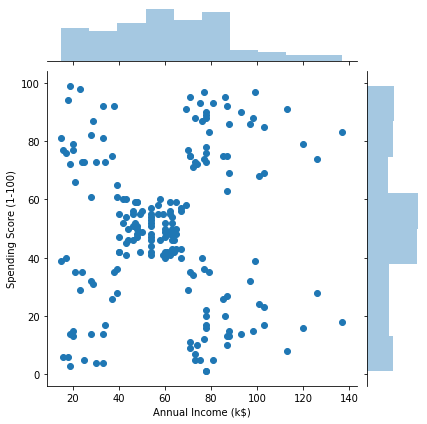

In [31]:
sns.jointplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = data)

In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=2, init = "k-means++")
kmeans.fit(data)
kmeans.inertia_

183154.5795215694

In [34]:
wcss  = []
for i in range(1,11):
    k = KMeans(n_clusters=i)
    k.fit(data)
    wcss.append(k.inertia_)

In [35]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37271.8862365895,
 30241.34361793659,
 25061.304119069333,
 21826.936303231654,
 19634.55462934998]

In [36]:
import matplotlib.pyplot as plt

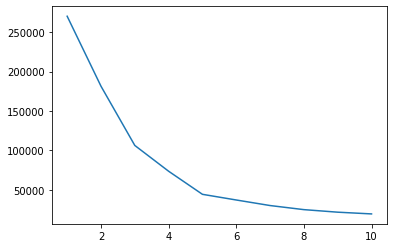

In [37]:
plt.plot(range(1,11), wcss)

In [38]:
k  = KMeans(n_clusters=5, init = "k-means++")
ykmeans = k.fit_predict(data)

In [39]:
ykmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [40]:
X = data.values

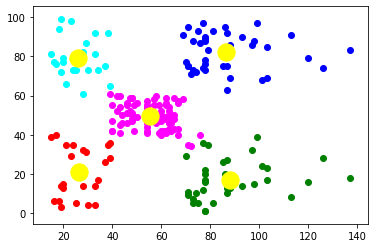

In [41]:
plt.scatter(X[ykmeans==0,0],X[ykmeans==0,1], c = 'red')
plt.scatter(X[ykmeans==1,0],X[ykmeans==1,1], c = 'blue')
plt.scatter(X[ykmeans==2,0],X[ykmeans==2,1], c = 'green')
plt.scatter(X[ykmeans==3,0],X[ykmeans==3,1], c = 'cyan')
plt.scatter(X[ykmeans==4,0],X[ykmeans==4,1], c = 'magenta')
plt.scatter(centroid[:,0], centroid[:,1], c = 'yellow', s = 300)

In [42]:
centroid = k.cluster_centers_

In [43]:
centroid

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])